In [2]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 7.1MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.61-py2.py3-none-any.whl size=23818 sha256=3a2dc2f10800c564ca0f7c712647328030d177a8d476a4290d5f5afdd143cf04
  Stored in directory: /root/.cache/pip/wheels/9c/b3/31/b5f2bcf2e3fd3f42e5ca1a3d20ada27eae8cbda7de75a5a2a0
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import datetime as dt
import yfinance as yf
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
btc = yf.download("BTC-USD", period="2y")
btc

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-09,12284.326172,12779.131836,12233.261719,12573.812500,12573.812500,28167921523
2019-07-10,12571.537109,13129.529297,11710.978516,12156.512695,12156.512695,33627574244
2019-07-11,12139.713867,12144.623047,11158.922852,11358.662109,11358.662109,28595327690
2019-07-12,11354.299805,11905.487305,11179.144531,11815.986328,11815.986328,23534692797
2019-07-13,11813.126953,11841.957031,10908.479492,11392.378906,11392.378906,21042616384
...,...,...,...,...,...,...
2021-07-05,35284.343750,35284.343750,33213.660156,33746.003906,33746.003906,26721554282
2021-07-06,33723.507812,35038.535156,33599.917969,34235.195312,34235.195312,26501259870
2021-07-07,34225.679688,34997.664062,33839.289062,33855.328125,33855.328125,24796027477


In [6]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 728 entries, 2019-07-09 to 2021-07-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       728 non-null    float64
 1   High       728 non-null    float64
 2   Low        728 non-null    float64
 3   Close      728 non-null    float64
 4   Adj Close  728 non-null    float64
 5   Volume     728 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 39.8 KB


In [7]:
df = btc[["Close"]].copy()
df

,Close
Date,
2019-07-09,12573.812500
2019-07-10,12156.512695
2019-07-11,11358.662109
2019-07-12,11815.986328
2019-07-13,11392.378906
...,...
2021-07-05,33746.003906
2021-07-06,34235.195312
2021-07-07,33855.328125


In [8]:
df.describe()

,Close
count,728.000000
mean,19566.319392
std,16488.867028
min,4970.788086
25%,8939.365967
50%,10425.701660
75%,32082.548828
max,63503.457031


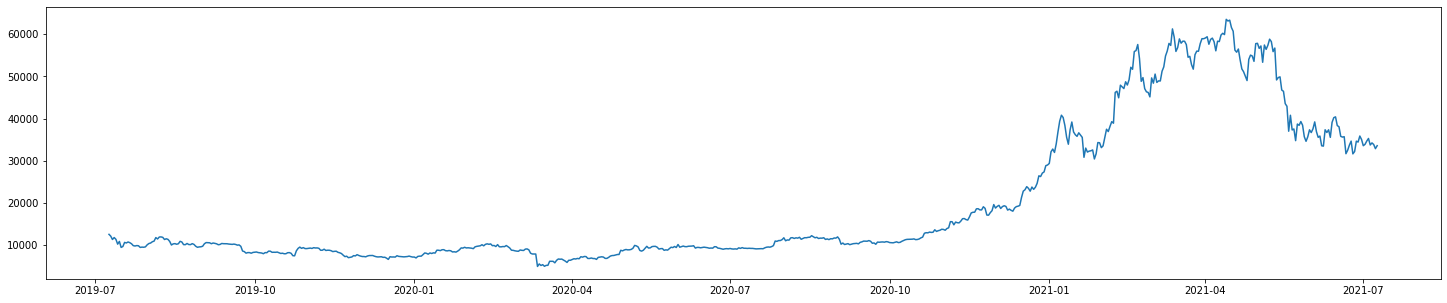

In [9]:
plt.figure(figsize=(25,5))
plt.plot(df["Close"])

In [10]:
df["returns"] = df["Close"].pct_change()
df

,Close,returns
Date,,
2019-07-09,12573.812500,NaN
2019-07-10,12156.512695,-0.033188
2019-07-11,11358.662109,-0.065632
2019-07-12,11815.986328,0.040262
2019-07-13,11392.378906,-0.035850
...,...,...
2021-07-05,33746.003906,-0.043692
2021-07-06,34235.195312,0.014496
2021-07-07,33855.328125,-0.011096


In [11]:
df["log_returns"] = np.log(1 + df["returns"])

In [12]:
df

,Close,returns,log_returns
Date,,,
2019-07-09,12573.812500,NaN,NaN
2019-07-10,12156.512695,-0.033188,-0.033751
2019-07-11,11358.662109,-0.065632,-0.067884
2019-07-12,11815.986328,0.040262,0.039473
2019-07-13,11392.378906,-0.035850,-0.036509
...,...,...,...
2021-07-05,33746.003906,-0.043692,-0.044675
2021-07-06,34235.195312,0.014496,0.014392
2021-07-07,33855.328125,-0.011096,-0.011158


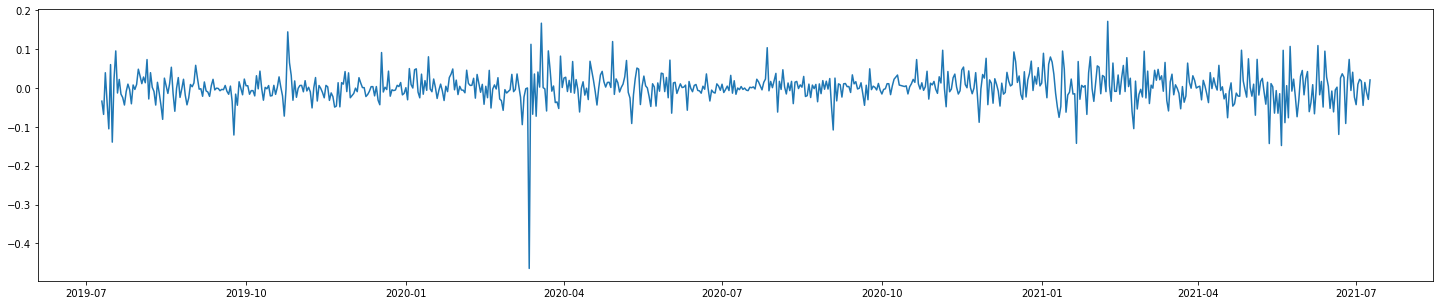

In [13]:
plt.figure(figsize=(25,5))
plt.plot(df["log_returns"])

# Preprocessing

In [14]:
df.dropna(inplace=True)
X = df[["Close", "log_returns"]].values
X

array([[ 1.21565127e+04, -3.37512276e-02],
       [ 1.13586621e+04, -6.78844162e-02],
       [ 1.18159863e+04,  3.94727539e-02],
       ...,
       [ 3.38553281e+04, -1.11578267e-02],
       [ 3.28773711e+04, -2.93117785e-02],
       [ 3.35723203e+04,  2.09173148e-02]])

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler(feature_range=(0,1)).fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[0.12276434, 0.67705357],
       [0.10913348, 0.62343147],
       [0.11694663, 0.792086  ],
       ...,
       [0.49347724, 0.71254705],
       [0.47676936, 0.68402779],
       [0.4886422 , 0.76293603]])

In [17]:
y = [x[0] for x in X_scaled]
y[:5]

[0.12276434235535501,
 0.10913348286588022,
 0.11694662767869034,
 0.10970951668566899,
 0.09029607914770753]

# Train test split

In [18]:
X_train = X_scaled[:int(len(X_scaled)*0.8)]
X_test = X_scaled[int(len(X_scaled)*0.8):]
y_train = y[:int(len(X_scaled)*0.8)]
y_test = y[int(len(X_scaled)*0.8):]

In [19]:
len(X_train)

581

In [20]:
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

# Labeling

In [21]:
n = 5

Xtrain = []
ytrain = []
Xtest = []
ytest = []

for i in range(n, len(X_train)):
  Xtrain.append(X_train[i-n:i, :X_train.shape[1]])
  ytrain.append(y_train[i])
for i in range(n, len(X_test)):
  Xtest.append(X_test[i-n:i, :X_test.shape[1]])
  ytest.append(y_test[i]) 

In [22]:
df.head()

,Close,returns,log_returns
Date,,,
2019-07-10,12156.512695,-0.033188,-0.033751
2019-07-11,11358.662109,-0.065632,-0.067884
2019-07-12,11815.986328,0.040262,0.039473
2019-07-13,11392.378906,-0.035850,-0.036509
2019-07-14,10256.058594,-0.099744,-0.105076


In [23]:
Xtrain[0]

array([[0.12276434, 0.67705357],
       [0.10913348, 0.62343147],
       [0.11694663, 0.792086  ],
       [0.10970952, 0.67272156],
       [0.09029608, 0.56500472]])

In [24]:
ytrain[0]

0.10121359344381885

In [25]:
val = np.array(ytrain[0])
val = np.c_[val, np.zeros(val.shape)]

In [26]:
scaler.inverse_transform(val)

array([[ 1.08950898e+04, -4.64730175e-01]])

In [27]:
Xtrain, ytrain = (np.array(Xtrain), np.array(ytrain))
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))

Xtest, ytest = (np.array(Xtest), np.array(ytest))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))

In [28]:
print(Xtrain.shape)
print(ytrain.shape)
print("---")
print(Xtest.shape)
print(ytest.shape)

(576, 5, 2)
(576,)
---
(141, 5, 2)
(141,)


# LSTM Model

In [29]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [30]:
model = Sequential([
                    LSTM(10, input_shape=(Xtrain.shape[1], Xtrain.shape[2])),
                    Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                520       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(Xtrain, ytrain, epochs=100, validation_data=(Xtest,ytest), batch_size=16, verbose=1)

Epoch 1/100
36/36 [==============================] - 18s 28ms/step - loss: 0.0393 - val_loss: 0.6513
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0222 - val_loss: 0.4456
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0146 - val_loss: 0.2873
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0165 - val_loss: 0.1817
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0084 - val_loss: 0.0826
Epoch 6/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0202
Epoch 7/100
36/36 [==============================] - 0s 3ms/step - loss: 7.4562e-04 - val_loss: 0.0040
Epoch 8/100
36/36 [==============================] - 0s 3ms/step - loss: 3.2449e-04 - val_loss: 0.0026
Epoch 9/100
36/36 [==============================] - 0s 4ms/step - loss: 1.6462e-04 - val_loss: 0.0027
Epoch 10/100
36/36 [==============================] - 0s 3ms/step - loss: 2.5389e-04 - val_loss

In [32]:
trainpred = model.predict(Xtrain)
testpred = model.predict(Xtest)

In [33]:
trainpred = np.c_[trainpred, np.zeros(trainpred.shape)]
testpred = np.c_[testpred, np.zeros(testpred.shape)]

In [34]:
trainpred = scaler.inverse_transform(trainpred)
trainpred = [x[0] for x in trainpred]

testpred = scaler.inverse_transform(testpred)
testpred = [x[0] for x in testpred]

In [35]:
print(trainpred[:5])
print(testpred[:5])

[10076.502780647234, 11059.498449973746, 9245.6911379035, 9689.9704248248, 10757.296081165345]
[51055.69993436453, 53475.55521777243, 54220.613435374515, 55508.62956700841, 53925.98965350905]


In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
trainScore = mean_squared_error([x[0][0] for x in Xtrain], trainpred, squared=False)
print("Train score: %.2f RMSE" % (trainScore))

testScore = mean_squared_error([x[0][0] for x in Xtest], testpred, squared=False)
print("Test score: %.2f RMSE" % (testScore))

Train score: 14931.16 RMSE
Test score: 48711.96 RMSE


In [38]:
from sklearn.metrics import mean_absolute_error

In [39]:
trainScore = mean_absolute_error([x[0][0] for x in Xtrain], trainpred)
print("Train score: %.2f MAE" % (trainScore))

testScore = mean_absolute_error([x[0][0] for x in Xtest], testpred)
print("Test score: %.2f MAE" % (testScore))

Train score: 12531.83 MAE
Test score: 47977.36 MAE


In [82]:
a = ytest
a = a.reshape(141,1)
b = model.predict(Xtest)

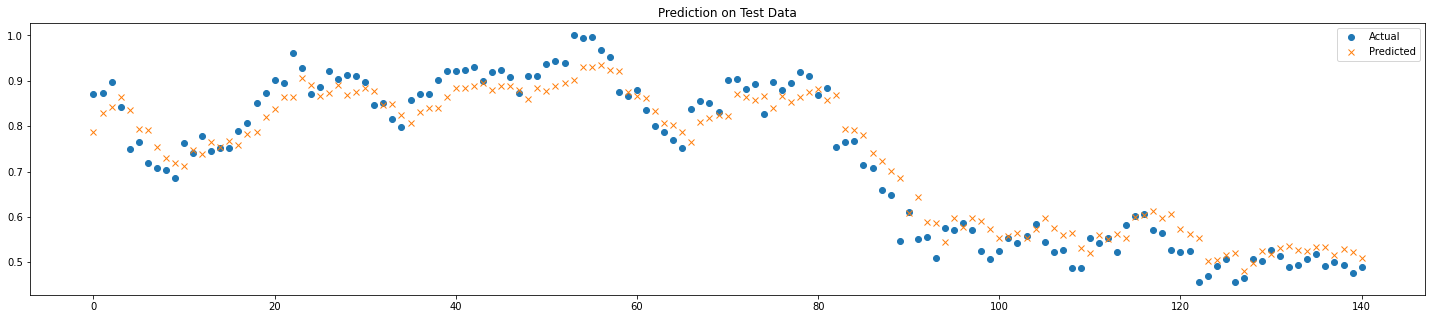

In [83]:
plt.figure(figsize=(25,5))
plt.plot(a, 'o', label='Actual')
plt.plot(b, 'x', label='Predicted')
plt.title('Prediction on Test Data')
plt.legend()